In [2]:
import csv
import datetime
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_dir = "."
def get_files(file_re):
    files = []
    for filename in os.listdir(data_dir):
        print(filename)

def get_csv_data(filename):
    data = []
    with open(filename, 'r') as f:
        b = csv.reader(f)
        next(b)
        for row in b:
            data.append(row)
    return data

In [4]:
data = get_csv_data("complied_all_data.csv")


In [5]:
src = 'knu'
dest = 'blr'

In [6]:
def filter_data(src_, dest_):
    new = []
    for row in data:
        if row[0] == src_ and row[1]==dest_:
            new.append(row)
    return new

In [7]:
filt_data = filter_data(src, dest)

In [8]:
filt_data.sort(key=lambda x: (x[3], x[2]))

In [17]:
data = {}
travel_date = ""
cutoff_date = "2024-12-31"
for ix in range(len(filt_data)):
    r = filt_data[ix]
    if r[3] > cutoff_date: continue
    if travel_date!=r[3]:
        travel_date = r[3]
        data[travel_date] = {}
        
    if travel_date==r[3]:
        data[travel_date][r[2]] = int(r[4])

In [10]:
inf = float('inf')

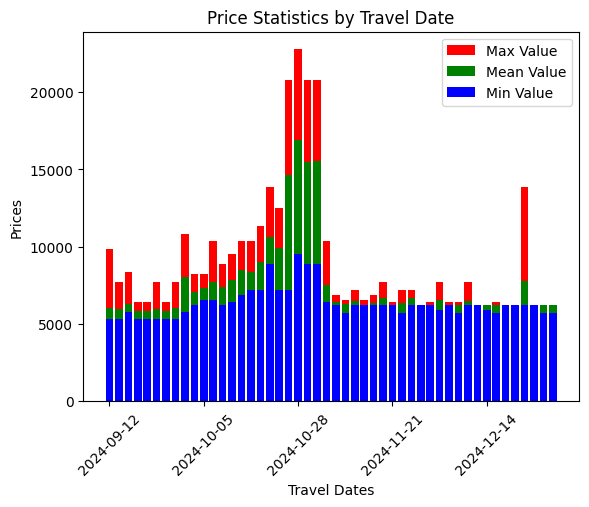

In [26]:
# X = [r for r in range(len(data))]
X = list(data.keys())
Y1 = []
Y2 = []
Y3 = []

for travel_date in data:
    prices = [x[1] for x in data[travel_date].items()]
    
    min_val = min(prices)
    max_val = max(prices)
    mean_val = sum(prices) / len(prices)    
        
    Y1.append(min_val)
    Y2.append(mean_val)
    Y3.append(max_val)

X_axis = range(len(X))
plt.xticks(ticks=[i for i in X_axis if i % 10 == 0], labels=[X[i] for i in range(len(X)) if i % 10 == 0], rotation=45)  
# plt.plot(X,Y1)
# plt.plot(X,Y2)
# plt.plot(X,Y3)
width = 0.25
plt.bar(X_axis, Y3, color='red', label="Max Value")   # Plot max first
plt.bar(X_axis, Y2, color='green', label="Mean Value") # Plot mean second (on top of max)
plt.bar(X_axis, Y1, color='blue', label="Min Value")   # Plot min last (on top of mean)
plt.xlabel("Travel Dates")
plt.ylabel("Prices")
plt.title("Price Statistics by Travel Date")
plt.legend()

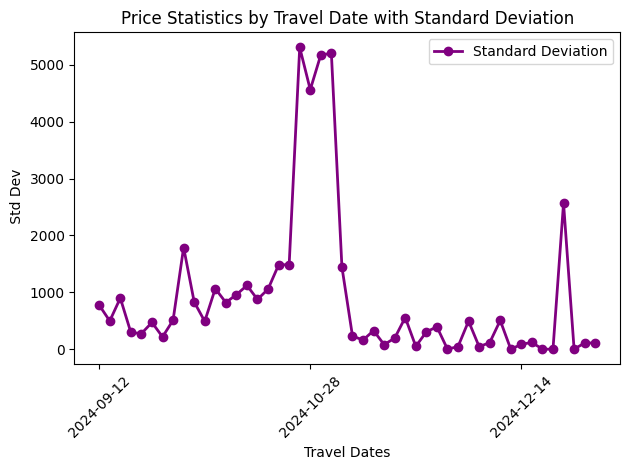

In [ ]:

import numpy as np

# Prepare the data for plotting
X = list(data.keys())  # Use the keys of 'data' as labels
Y_std = []  # Standard deviation

for travel_date in data:
    prices = [x[1] for x in data[travel_date].items()]    
    
    std_val = np.std(prices)  # Calculate standard deviation
    
    
    Y_std.append(std_val)

# Set the positions for each bar
X_axis = range(len(X))



# Plot the standard deviation as a line graph
plt.plot(X_axis, Y_std, color='purple', marker='o', label="Standard Deviation", linewidth=2)

# Label the axes
plt.xlabel("Travel Dates")
plt.ylabel(" Std Dev")
plt.title("Price Statistics by Travel Date with Standard Deviation")

# Set the x-axis labels every 20 steps
plt.xticks(ticks=[i for i in X_axis if i % 20 == 0], labels=[X[i] for i in range(len(X)) if i % 20 == 0], rotation=45)


# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
